# Team 6 Group Project - Nardos Bogale, Abdoulay Lashley, Alexis Herbert, Yimin Tang, Kareem Kassamia

# Introduction

Dataset Link: https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs

**Basic Track Information**
*   track_name: Name of the song.
*   artist(s)_name: Name of the artist(s) performing the song.
*   artist_count: Number of artists contributing to the song.
*   released_year, released_month, released_day: Release date details.

**Streaming Metrics**
*   in_spotify_playlists: Number of Spotify playlists the song is featured in.
*   in_spotify_charts: Rank of the song on Spotify charts.
*   streams: Total number of streams on Spotify.
*   in_apple_playlists, in_apple_charts: Presence in Apple Music playlists and charts.
*   in_deezer_playlists, in_deezer_charts: Presence in Deezer playlists and charts.
*   in_shazam_charts: Rank on Shazam charts.

**Musical Attributes**
*   bpm: Beats per minute, representing the tempo of the song.
*   key: Key of the song.
*   mode: Indicates whether the song is in a major or minor mode.
*   danceability_%: Suitability of the song for dancing.
*   valence_%: Positivity of the song’s musical content.
*   energy_%: Perceived energy level of the song.
*   acousticness_%: Acoustic sound presence in the song.
*   instrumentalness_%: Proportion of instrumental content in the track.
*   liveness_%: Presence of live performance elements.
*   speechiness_%: Amount of spoken words in the song.

# Importing
*   To begin, we began by importing the necessary libraries and creating a path to Kaggle to access the dataset.


In [ ]:
!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 40.3 MB/s eta 0:00:00
Colab environment detected.


In [ ]:
#Importing Libraries
import pandas as pd
import os
import kagglehub
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import sklearn.linear_model as sklm
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
                            classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score

import plotly.express as px
import shap

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.inspection import PartialDependenceDisplay

In [ ]:
path = kagglehub.dataset_download("abdulszz/spotify-most-streamed-songs")

print("Path to dataset files:", path)

100%|██████████| 60.0k/60.0k [00:00<00:00, 46.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdulszz/spotify-most-streamed-songs/versions/2


In [ ]:
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break

# Cleaning
*   Creating a dataset based on the CSV file, we analyzed the variables and saw that streams, in_deezer_playlists, and in_shazam_charts were catgorized as objects when they should be intergers. So we converted those variables into intergers.



In [ ]:
spotify_df = pd.read_csv(csv_file_path)
spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found


In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# Turn object type into integer
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce').fillna(0).astype(int)
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'], errors='coerce').fillna(0).astype(int)
spotify_df['in_shazam_charts'] = pd.to_numeric(spotify_df['in_shazam_charts'], errors='coerce').fillna(0).astype(int)
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Backward Elimination
*   Selecting only interger type variables, we created variables designating which ones are predictors and outcome variables. We chose streams as our outcome variable to measure popularity of a song.
*   From there we split the dataset into training and validation data and made sure to fill in any na values with the mean.
*   After completing this we ran all the variables into backwards elimination which eliminated 6 variables.
*   From the remaining variables we created another datset just based on the essential variables.



In [ ]:
spotify_int = spotify_df.select_dtypes(include=['int64'])
print(list(spotify_int.columns))

['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


In [ ]:
predictors = ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
outcome = 'streams'

In [ ]:
X = spotify_df[predictors]
y = spotify_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
train_X.fillna(train_X.mean(), inplace=True)
valid_X.fillna(valid_X.mean(), inplace=True)
train_y.fillna(train_y.mean(), inplace=True)
valid_y.fillna(valid_y.mean(), inplace=True)

In [ ]:
def train_model(variables):
    model = sklm.LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%
Start: score=23899.10
Step: score=23897.11, remove in_apple_charts
Step: score=23895.14, remove released_month
Step: score=23893.38, remove liveness_%
Step: score=23892.09, remove released_day
Step: score=23891.05, remove valence_%
Step: score=23890.26, remove speechiness_%
Step: score=23890.26, remove None
['artist_count', 'released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']


In [ ]:
variable_names = ['streams', 'artist_count', 'released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']
spotify_data = spotify_df[variable_names]
display(spotify_data)

,streams,artist_count,released_year,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,energy_%,acousticness_%,instrumentalness_%
0,141381703,2,2023,553,147,43,45,10,826,125,80,83,31,0
1,133716286,1,2023,1474,48,48,58,14,382,92,71,74,7,0
2,140003974,1,2023,1397,113,94,91,14,949,138,51,53,17,0
3,800840817,1,2019,7858,100,116,125,12,548,170,55,72,11,0
4,303236322,1,2023,3133,50,84,87,15,425,144,65,80,14,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,91473363,1,2022,953,0,61,37,1,0,144,60,39,57,0
949,121871870,1,2022,1180,0,4,8,0,0,166,42,24,83,1
950,73513683,2,2022,573,0,2,7,0,0,92,80,67,4,0
951,133895612,3,2022,1320,0,29,17,0,0,97,82,77,8,0


In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   streams               953 non-null    int64
 1   artist_count          953 non-null    int64
 2   released_year         953 non-null    int64
 3   in_spotify_playlists  953 non-null    int64
 4   in_spotify_charts     953 non-null    int64
 5   in_apple_playlists    953 non-null    int64
 6   in_deezer_playlists   953 non-null    int64
 7   in_deezer_charts      953 non-null    int64
 8   in_shazam_charts      953 non-null    int64
 9   bpm                   953 non-null    int64
 10  danceability_%        953 non-null    int64
 11  energy_%              953 non-null    int64
 12  acousticness_%        953 non-null    int64
 13  instrumentalness_%    953 non-null    int64
dtypes: int64(14)
memory usage: 104.4 KB


## Variable Importance
*   After conducting the backwards elimination, we also conducted a variable importance analysis to see which variables had the most impact on predicting streams.
*   The analysis showed that in_spotify_playlists, in_apple_playlists, and released_year have the most impact, which makes sense as people have a tendency to listen to songs more when they are included in playlists and the released year of couse would be important as most streams are counted close to after the release date.



In [ ]:
X2 = spotify_data.drop('streams', axis=1)
X2 = X2.reset_index()
X2 = X2.drop('index', axis=1)
Y2 = spotify_data['streams']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.25, random_state=7)

In [ ]:
X2_train.fillna(X2_train.mean(), inplace=True)
X2_test.fillna(X2_test.mean(), inplace=True)
Y2_train.fillna(Y2_train.mean(), inplace=True)
Y2_test.fillna(Y2_test.mean(), inplace=True)

In [ ]:
Streamsreg_bag = RandomForestRegressor(max_features=13, random_state=23)
Streamsreg_RF = RandomForestRegressor(max_features=12, random_state=23)
Streamsreg_boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=23)

In [ ]:
Streamsreg_bag.fit(X2_train, Y2_train)
Streamsreg_RF.fit(X2_train, Y2_train)
Streamsreg_boost.fit(X2_train, Y2_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=23)

In [ ]:
Streamsbag_predictions_tr = Streamsreg_bag.predict(X2_train)
StreamsRF_predictions_tr = Streamsreg_RF.predict(X2_train)
Streamsboost_predictions_tr = Streamsreg_boost.predict(X2_train)

In [ ]:
regressionSummary(Y2_train, Streamsbag_predictions_tr)
regressionSummary(Y2_train, StreamsRF_predictions_tr)
regressionSummary(Y2_train, Streamsboost_predictions_tr)


Regression statistics

               Mean Error (ME) : -1663425.6748
Root Mean Squared Error (RMSE) : 84692124.2789
     Mean Absolute Error (MAE) : 52903066.6118

Regression statistics

               Mean Error (ME) : -1004419.5226
Root Mean Squared Error (RMSE) : 83219095.9772
     Mean Absolute Error (MAE) : 52351911.2320

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 147833764.2381
     Mean Absolute Error (MAE) : 104222893.9556


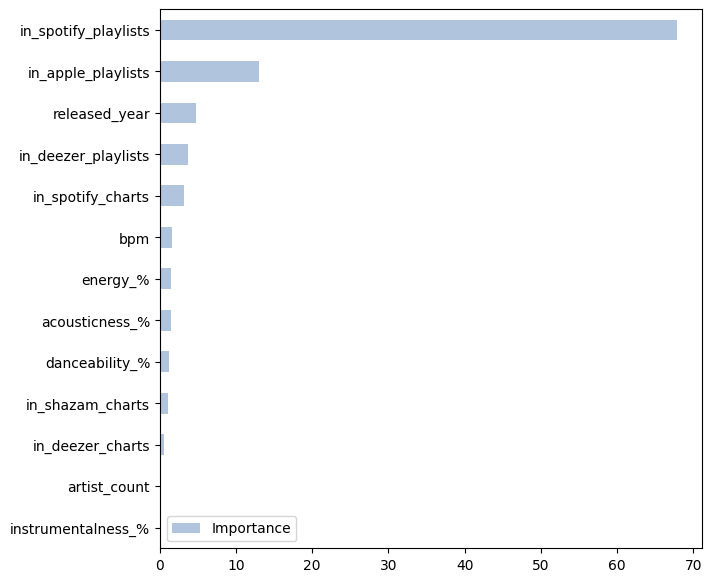

In [ ]:
Importance = pd.DataFrame({'Importance':Streamsreg_RF.feature_importances_*100}, \
                          index=X2.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsteelblue', )
plt.gcf().set_size_inches(7, 7)

## Partial Dependency
*   In addition to conducting a variable importance analysis, we also created partial dependency plots to see the impact of the top 3 variables.
*   in_spotify_playlists show a strong positive impact on streams along with in_apple_playlists and released_year to a lesser extent.



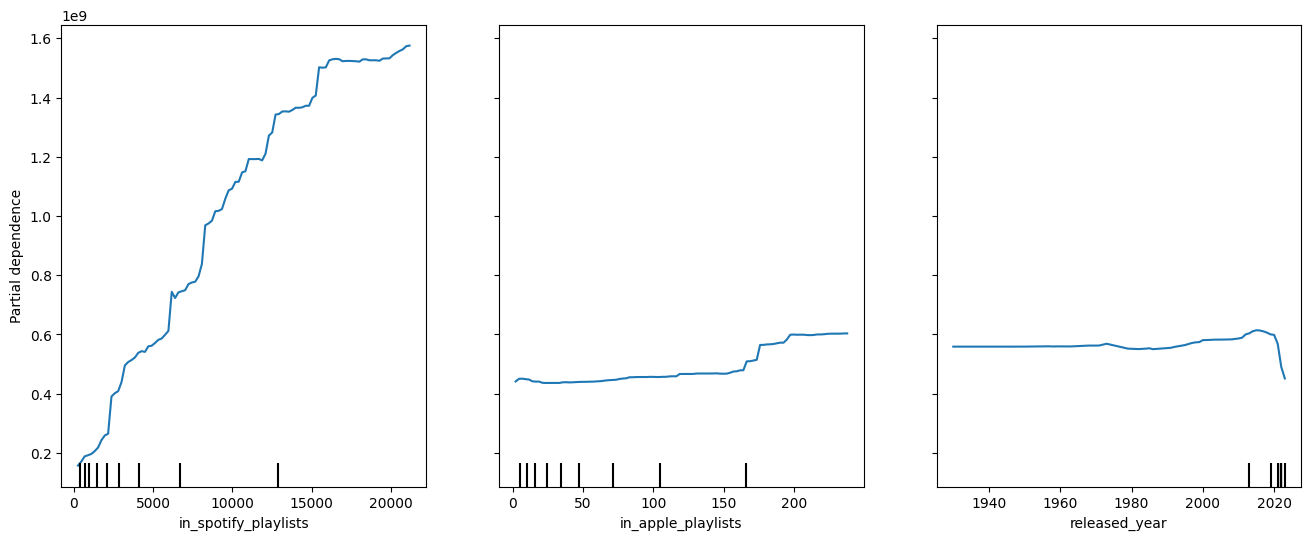

In [ ]:
features = [2,4,1]
fig, ax = plt.subplots(figsize=(16,6))
PartialDependenceDisplay.from_estimator(Streamsreg_RF, X2_train, features, ax=ax)
plt.show()

# Visualizations

- Now that the we created a clean dataset we will use diifferent visualizations to view the data better.
- We will focus more on The Weeknd and get better insights



## Top Songs Per Released Year Based on Streams


- This visualization will help provide insights into the most streamed songs by released year.
- To better analyze the impact of artists and tracks in different years and who was considered the most popular.

In [ ]:
#Group by wanted attribute
most_popular_by_released_year = spotify_df.loc[spotify_df.groupby('released_year')['streams'].idxmax()]

#Plot the graph
fig = px.line(most_popular_by_released_year, x='released_year', y='streams',
              hover_data=['track_name','artist(s)_name'],
              title='Top Songs Per Released Year')

fig.show()

## Top Streams & Artists Over Time

This  visualization provides insight into the top 5 artist streamed and artists streams over time.


<Figure size 1400x800 with 0 Axes>

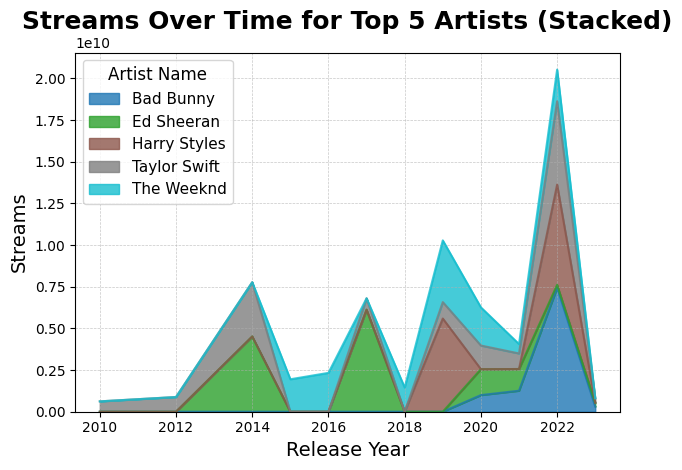

In [ ]:
top_5_artists = spotify_df.groupby('artist(s)_name')['streams'].sum().nlargest(5).index
top_artist_data = spotify_df[spotify_df['artist(s)_name'].isin(top_5_artists)]
area_data = top_artist_data.groupby(['released_year', 'artist(s)_name'])['streams'].sum().reset_index()

area_pivot = area_data.pivot(index='released_year', columns='artist(s)_name', values='streams').fillna(0)

plt.figure(figsize=(14, 8))
area_pivot.plot(kind='area', stacked=True, colormap='tab10', alpha=0.8)

plt.title('Streams Over Time for Top 5 Artists (Stacked)', fontsize=18, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.legend(title='Artist Name', title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()


<ipython-input-25-a0bd080926ba>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




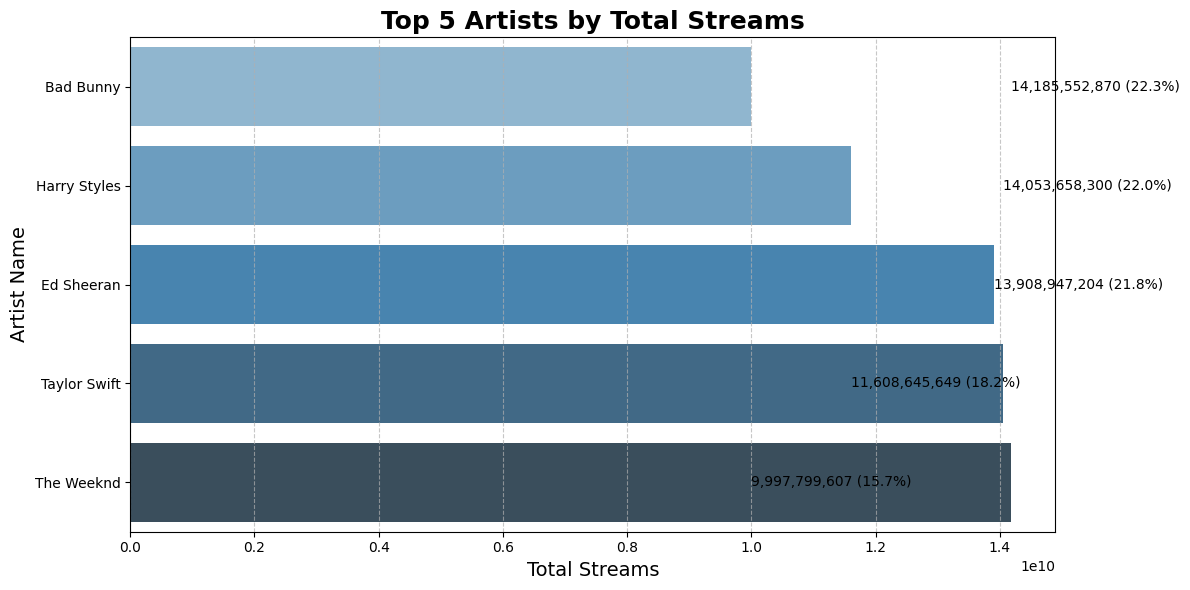

In [ ]:
top_5_artists_streams = spotify_df.groupby('artist(s)_name')['streams'].sum().nlargest(5).reset_index()

total_streams = top_5_artists_streams['streams'].sum()
top_5_artists_streams['percentage'] = (top_5_artists_streams['streams'] / total_streams) * 100

top_5_artists_streams = top_5_artists_streams.sort_values('streams', ascending=True)


plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_5_artists_streams,
    x='streams',
    y='artist(s)_name',
    palette='Blues_d'
)


for index, row in top_5_artists_streams.iterrows():
    plt.text(
        row['streams'] + 1000000,
        index,
        f"{row['streams']:,} ({row['percentage']:.1f}%)",
        va='center',
        fontsize=10
    )


plt.title('Top 5 Artists by Total Streams', fontsize=18, fontweight='bold')
plt.xlabel('Total Streams', fontsize=14)
plt.ylabel('Artist Name', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


## SHAP

In [ ]:
# Variables for SHAP Analysis

SHAP_variables = ['streams',
                  'danceability_%',
                  'energy_%',
                  'acousticness_%',
                  'instrumentalness_%']
SHAP_data = spotify_df[SHAP_variables]
SHAP_data

,streams,danceability_%,energy_%,acousticness_%,instrumentalness_%
0,141381703,80,83,31,0
1,133716286,71,74,7,0
2,140003974,51,53,17,0
3,800840817,55,72,11,0
4,303236322,65,80,14,63
...,...,...,...,...,...
948,91473363,60,39,57,0
949,121871870,42,24,83,1
950,73513683,80,67,4,0
951,133895612,82,77,8,0


In [ ]:
X3 = SHAP_data.drop('streams', axis=1)
X3 = X3.reset_index()
X3 = X3.drop('index', axis=1)
Y3 = SHAP_data['streams']

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.25, random_state=7) # train the dataset

In [ ]:
streamsreg_bag = RandomForestRegressor(max_features=4, random_state=23)
streamsreg_RF = RandomForestRegressor(max_features=3, random_state=23)
streamsreg_boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=23)

In [ ]:
streamsreg_bag.fit(X3_train, Y3_train)
streamsreg_RF.fit(X3_train, Y3_train)
streamsreg_boost.fit(X3_train, Y3_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=23)

In [ ]:
streamsbag_predictions_tr = streamsreg_bag.predict(X3_train)
streamsRF_predictions_tr = streamsreg_RF.predict(X3_train)
streamsboost_predictions_tr = streamsreg_boost.predict(X3_train)

In [ ]:
regressionSummary(Y3_train, streamsbag_predictions_tr)
regressionSummary(Y3_train, streamsRF_predictions_tr) # lowest RMSE
regressionSummary(Y3_train, streamsboost_predictions_tr)


Regression statistics

               Mean Error (ME) : -15106832.4580
Root Mean Squared Error (RMSE) : 220515543.7530
     Mean Absolute Error (MAE) : 159892430.4242

Regression statistics

               Mean Error (ME) : -9216196.6152
Root Mean Squared Error (RMSE) : 219550275.6432
     Mean Absolute Error (MAE) : 157744357.8705

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 472685020.6995
     Mean Absolute Error (MAE) : 339202373.2934


In [ ]:
explainer = shap.TreeExplainer(streamsreg_RF)
shap_values=explainer.shap_values(X3)
expected_value = explainer.expected_value

In [ ]:
# Means of each variable

print(X3_train['danceability_%'].mean())
print(X3_train['energy_%'].mean())
print(X3_train['acousticness_%'].mean())
print(X3_train['instrumentalness_%'].mean())

67.26890756302521
64.36134453781513
27.096638655462186
1.834733893557423


In [ ]:
spotify_df[spotify_df['track_name'] == 'Blinding Lights'].index[0] # Index of Blinding Lights

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[55,:], X3.iloc[55,:])

In [ ]:
spotify_df[spotify_df['track_name'] == 'Shape of You'].index[0] # Index of Shape of You

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[179,:], X3.iloc[179,:])

In [ ]:
spotify_df[spotify_df['track_name'] == 'Someone You Loved'].index[0] # Someone You Loved

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[86,:], X3.iloc[86,:])

# Takeaways


*   **Blinding Lights as a Benchmark of Success:**

  * Achieved 3.7 billion streams due to high
  danceability and energy, making it universally appealing across playlists.

* **Key Features Correlating with Success:**

  * Spotify data reveals that high energy, rhythmic appeal, and low acousticness strongly correlate with higher streams.

* **Global Influence:**

  * Ranked among top artists like Bad Bunny and Taylor Swift, blending nostalgic 80s vibes with modern production for worldwide appeal.

* **Data-Driven Creativity:**

  * SHAP analysis shows how artistry and analytics guide the creation of timeless tracks, setting new industry standards.


